# Finally, evaluate our algorithm for 5 episodes.
 

In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
import argparse
import json

import matplotlib.pyplot as plt


def visualize_log(filename, figsize=None, output=None):
    with open(filename, 'r') as f:
        data = json.load(f)
    if 'episode' not in data:
        raise ValueError('Log file "{}" does not contain the "episode" key.'.format(filename))
    episodes = data['episode']

    

    # Get value keys. The x axis is shared and is the number of episodes.
    keys = sorted(list(set(data.keys()).difference(set(['episode']))))

    if figsize is None:
        figsize = (35., 15. * len(keys))
    f, axarr = plt.subplots(len(keys), sharex=True, figsize=figsize)
    for idx, key in enumerate(keys):
        axarr[idx].plot(episodes, data[key])
        axarr[idx].set_ylabel(key)
        
    plt.xlabel('episodes')
    plt.tight_layout()
    if output is None:
        plt.show()
    else:
        plt.savefig(output)



In [3]:
#visualize_log('duel_dng_microagent-v19_log.json')

duel_dgn = pd.read_json('duel_dng_microagent-v19_log.json')
duel_dgn.shape

(150, 8)

In [4]:
#visualize_log('ddpg_microagent-v19_log.json')
ddpg  = pd.read_json('ddpg_microagent-v20_log.json')

ddpg.shape

(113, 8)

In [5]:
#visualize_log('dqn_aftersubmissionv21_log.json')

dqn  = pd.read_json('dqn_aftersubmissionv21_log.json')
dqn.shape

(581, 8)

In [6]:
#visualize_log('DQRN_microv2_log.json')

In [7]:
#visualize_log('DQRN_microv2_log.json')

DQRN  = pd.read_json('DQRN_microv2_log.json')
DQRN.shape

(125, 8)

In [8]:

#visualize_log('pgnn_PGNNv1_log.json')

PGNN  = pd.read_json('pgnn_PGNNv1_log.json')
PGNN.shape

(280, 8)

In [9]:
#pg-mean  = pd.read_json('pg-mean_reward.json')
#mean-reward = pd.read_csv('mean reward.csv', sep=',', delimiter=None)
#df = pd.read_csv('mean reward.csv')

In [10]:
#df.head(2)

In [11]:

pg_mean  = pd.read_csv('mean_reward_v2.csv')
pg_reward  = pd.read_csv('v2total_reward.csv')

pg_duration  = pd.read_csv('action_durationv2.csv')
pg_steps = pd.read_csv('nb_steps v2.csv')
pg_loss = pd.read_csv('lossv2.csv')
pg_action = pd.read_csv('nb_steps v2.csv')
PGNN = pd.DataFrame({'episode':pg_action['Value'], 
                     'episode_reward':pg_reward['Value'], 
                     'mean_q': pg_mean['Value'], 
                     'duration': pg_duration['Value'],
                     'nb_episode_steps' : pg_steps['Value'],
                     'loss':pg_loss['Value'],
                     'mean_absolute_error':pg_loss['Value']})

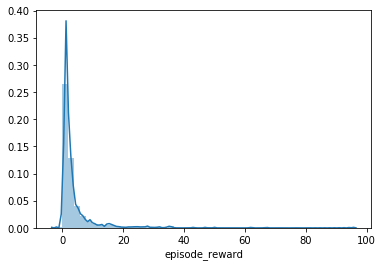

In [12]:
import seaborn as sns

sns.distplot(PGNN['episode_reward'])

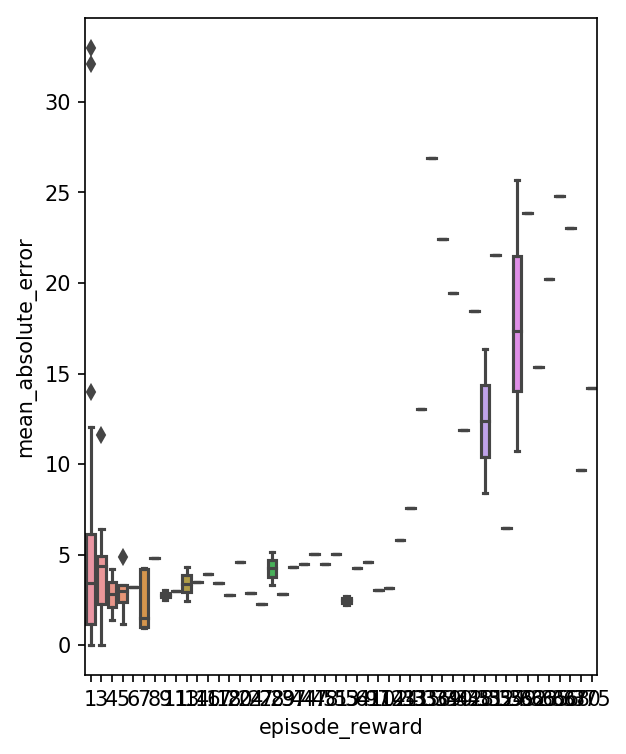

In [13]:
fig = plt.figure(figsize=[4.4, 5.8], dpi=150)


#sns.boxplot(x='episode_reward', y='mean_absolute_error', data=PGNN)
sns.boxplot(x='episode_reward', y='mean_absolute_error', data=duel_dgn)

In [14]:
#pg_mean['Value'].plot()

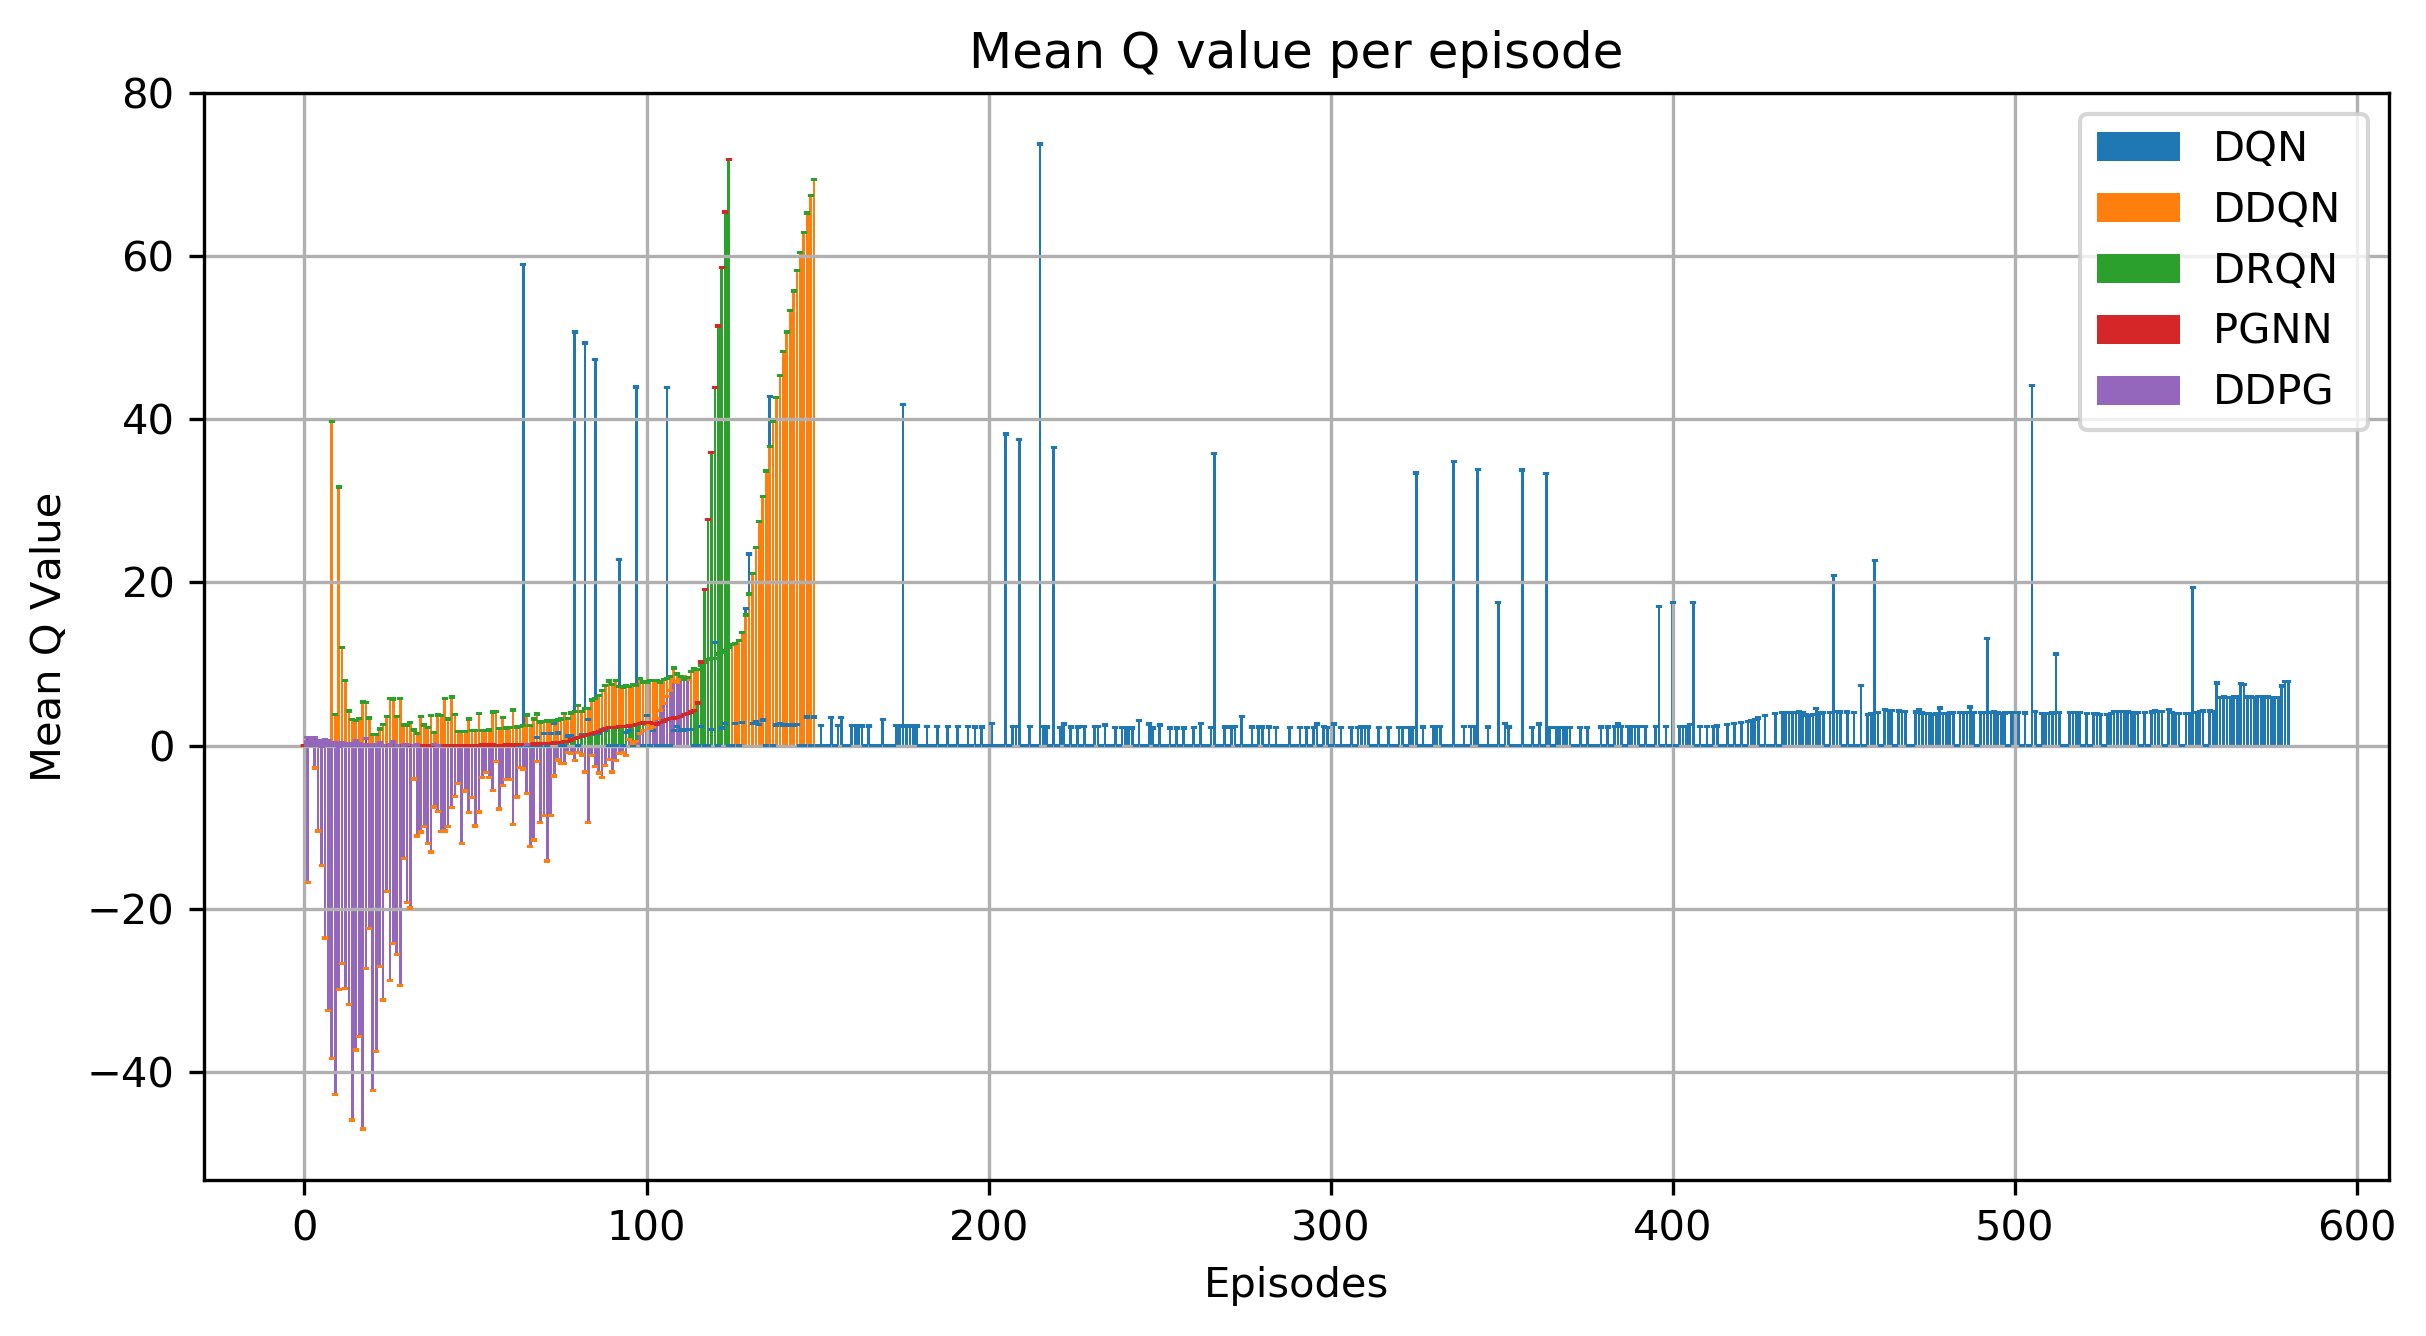

In [15]:
fig = plt.figure(figsize=[9.4, 4.8], dpi=300)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['mean_q'])

x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['mean_q'])

x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['mean_q'])

x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['mean_q'])


x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['mean_q'])

plt.bar(x1, y1, label='DQN', align='center')
plt.bar(x3, y3, label='DDQN', align='center')
plt.bar(x4, y4, label='DRQN ', align='center')
plt.bar(x5, y5, label='PGNN ', align='center')
plt.bar(x2, y2, label='DDPG', align='center')
plt.errorbar(x1, y1, yerr = 0.2, linestyle='None' )
plt.errorbar(x2, y2, yerr = 0.2, linestyle='None' )
plt.errorbar(x3, y3, yerr = 0.2, linestyle='None' )
plt.errorbar(x4, y4, yerr = 0.2, linestyle='None' )
plt.errorbar(x5, y5, yerr = 0.2, linestyle='None' )









#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('Mean Q Value')

plt.title("Mean Q value per episode")

plt.autoscale(enable=True, axis='both', tight=False)

plt.grid()
plt.legend()

plt.show()

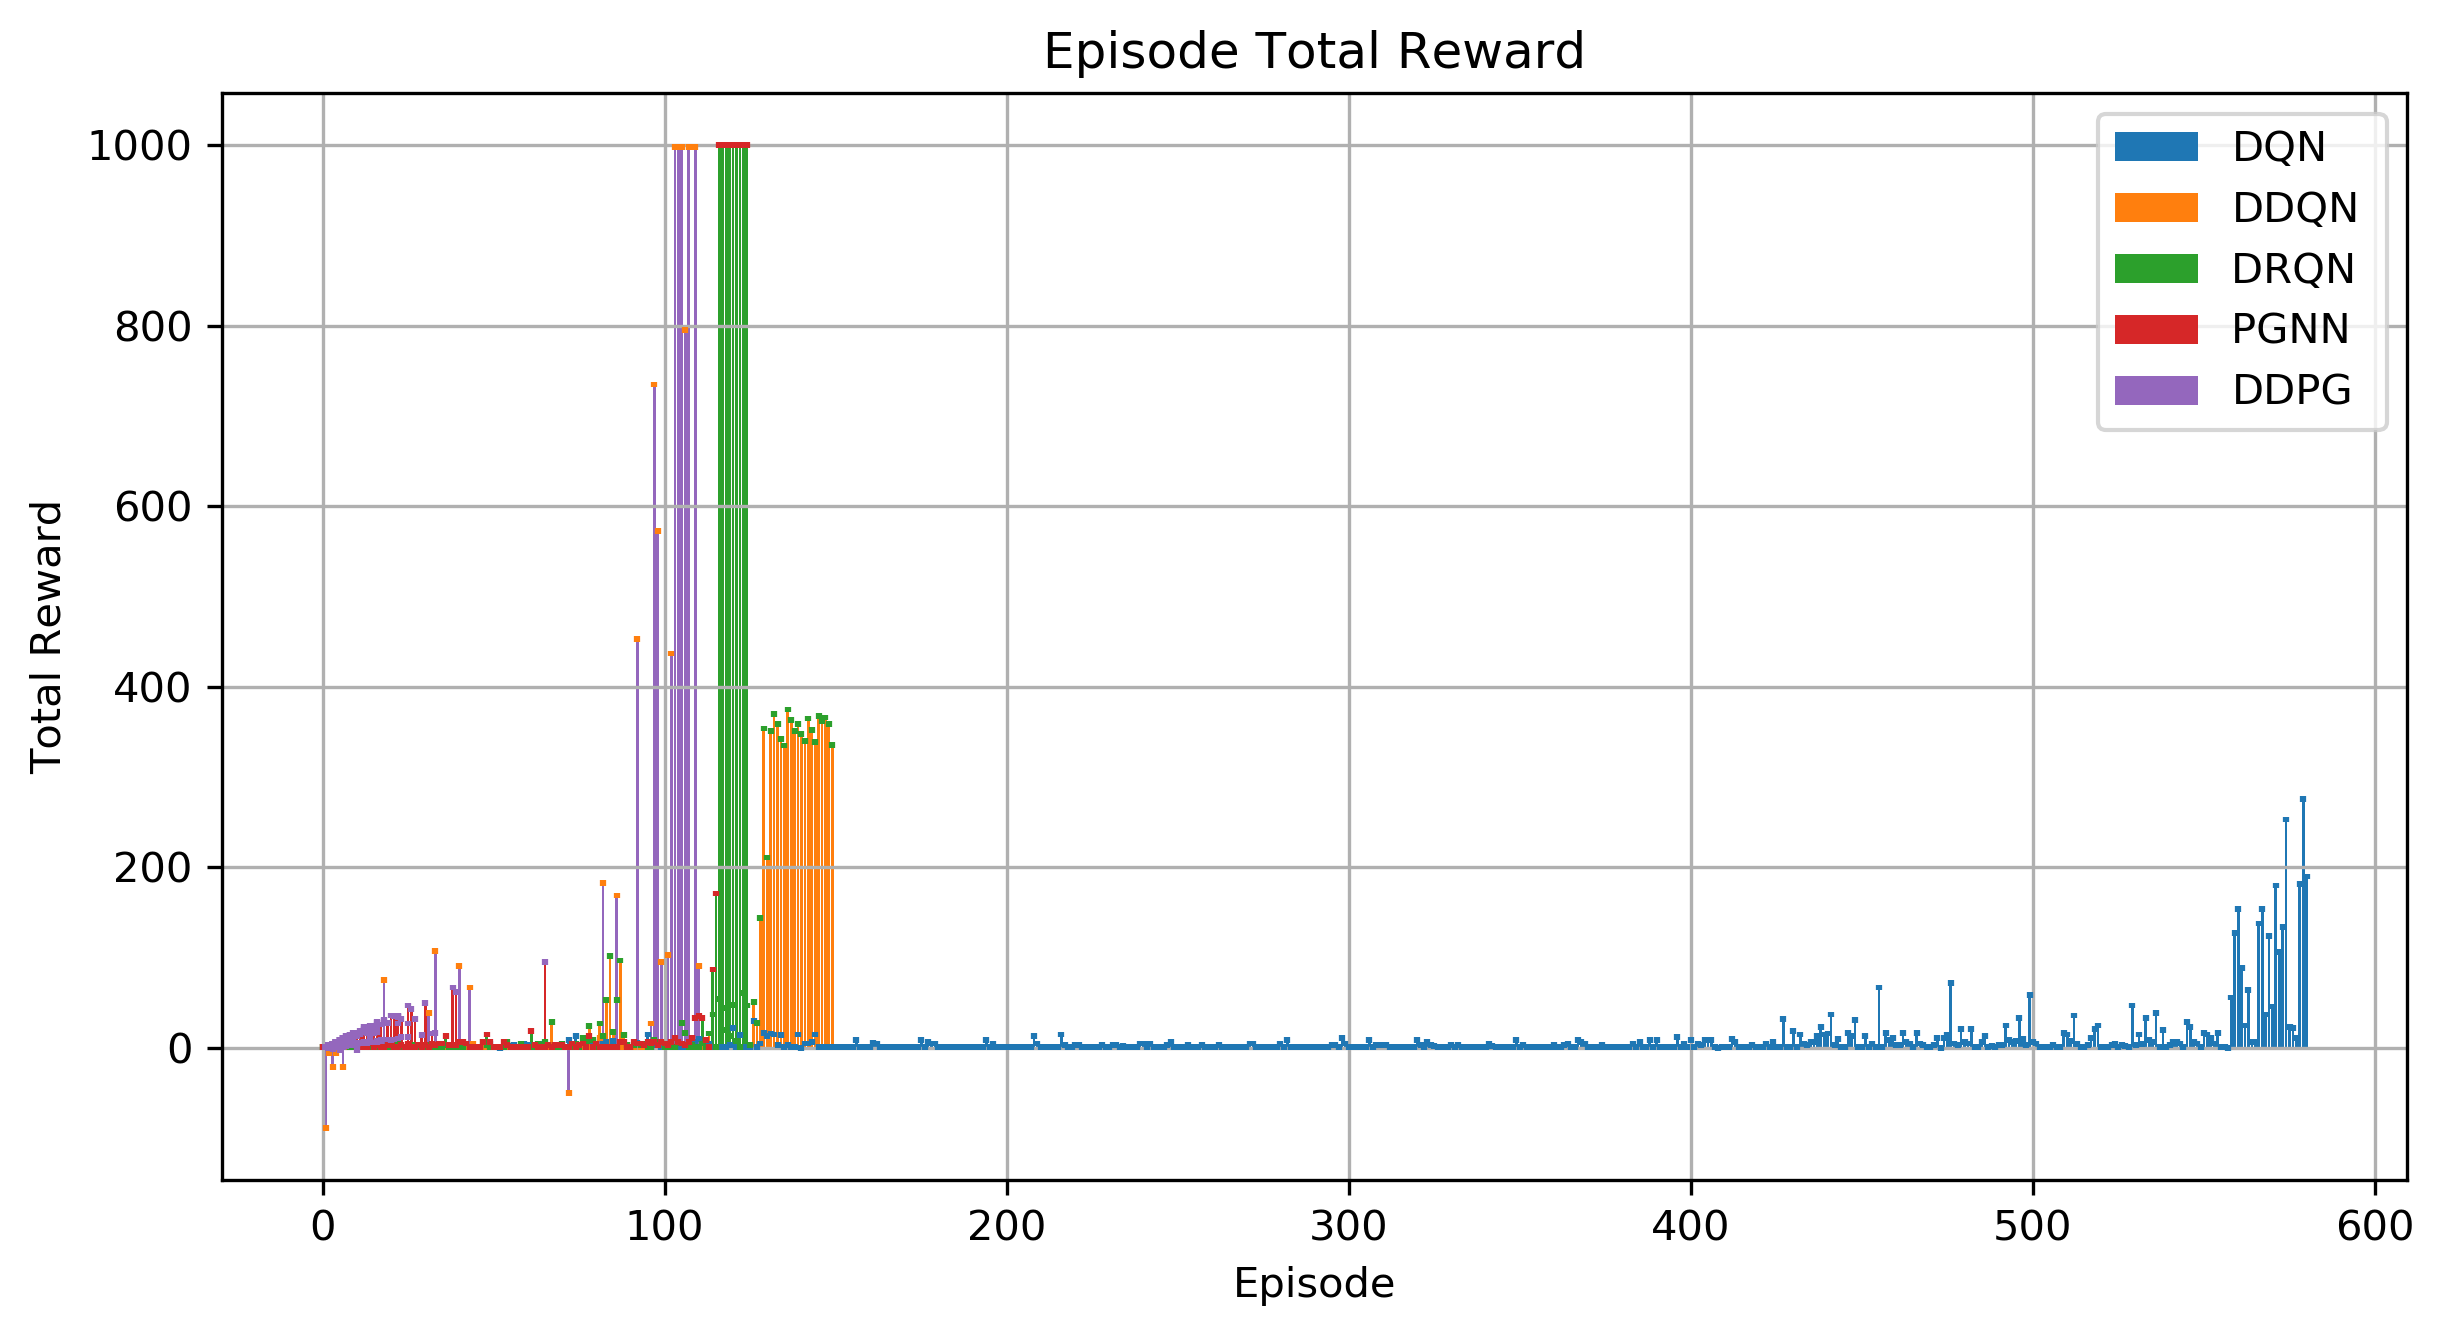

In [16]:
fig = plt.figure(figsize=[9.4, 4.8], dpi=300)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['episode_reward'])

x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['episode_reward'])

x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['episode_reward'])

x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['episode_reward'])

x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['episode_reward'])

plt.bar(x1, y1, label='DQN', align='center')
plt.bar(x3, y3, label='DDQN', align='center')
plt.bar(x4, y4, label='DRQN ', align='center')
plt.bar(x5, y5, label='PGNN ', align='center')
plt.bar(x2, y2, label='DDPG', align='center')

"""

plt.errorbar(x1, y1, dqn['mean_absolute_error']/dqn['mean_q'], linestyle='None', marker='^')
plt.errorbar(x2, y2, ddpg['mean_absolute_error']/ddpg['mean_q'], linestyle='None', marker='^')
plt.errorbar(x3, y3, duel_dgn['mean_absolute_error']/duel_dgn['mean_q'], linestyle='None', marker='^')
plt.errorbar(x4, y4, DQRN['mean_absolute_error']/DQRN['mean_q'], linestyle='None', marker='^')
plt.errorbar(x5, y5, PGNN['mean_absolute_error']/PGNN['mean_q'], linestyle='None', marker='^')


"""

plt.errorbar(x1, y1, yerr = 3.2, linestyle='None' )
plt.errorbar(x2, y2, yerr = 3.2, linestyle='None' )
plt.errorbar(x3, y3, yerr = 3.2, linestyle='None' )
plt.errorbar(x4, y4, yerr = 3.2, linestyle='None' )
plt.errorbar(x5, y5, yerr = 3.2, linestyle='None' )






#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')
plt.axis('tight')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.title("Episode Total Reward")
plt.grid()
plt.autoscale(enable=True, axis='both', tight=False)


plt.legend()

plt.show()

In [17]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

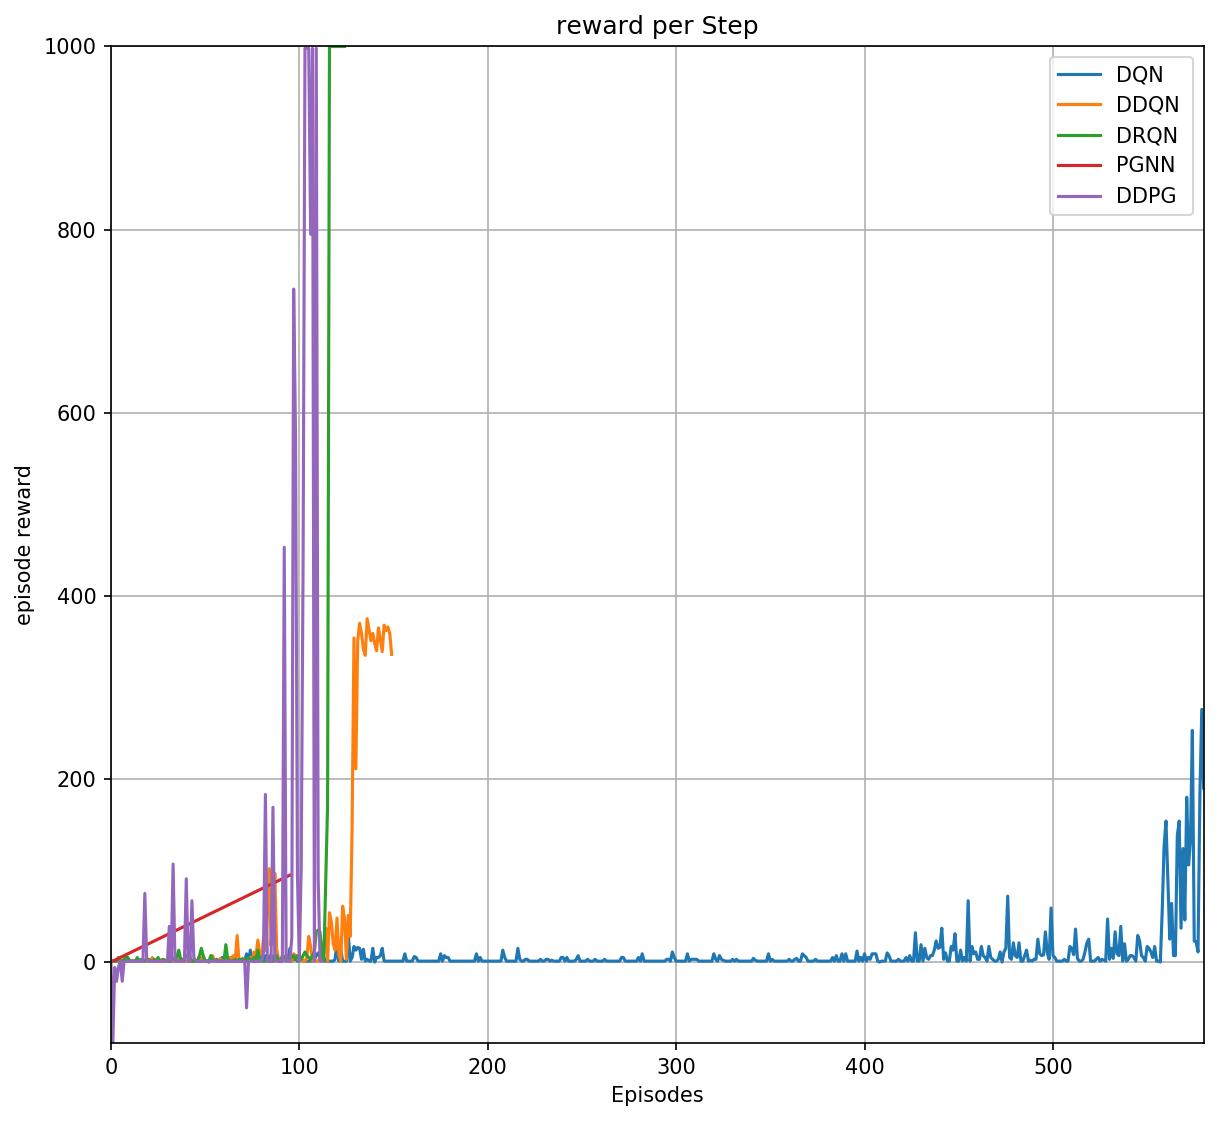

In [18]:
fig = plt.figure(figsize=[9.4, 8.8], dpi=150)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['episode_reward'])

cumsum_vec = np.cumsum(np.insert(y1, 0, 0)) 
window_width= 1
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width



x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['episode_reward'])

x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['episode_reward'])

x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['episode_reward'])

x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['episode_reward'])  

 

y1_av = movingaverage(y1, 27)
plt.plot(x1, y1, label='DQN', scaley=True )
y3_av = movingaverage(y3, 10)
plt.plot(x3, y3, label='DDQN', scaley=True)
y4_av = movingaverage(y4, 10)
plt.plot(x4, y4, label='DRQN ', scaley=True )

y5new = np.linspace(0,y5.max(),225)
x5new = np.linspace(x5.min(),x5.max() * 100,225)

y5_av = movingaverage(y5new, 10)
plt.plot(y5new, y5new, label='PGNN ', scaley=True )
y2_av = movingaverage(y2, 30)
plt.plot(x2, y2, label='DDPG', scaley=True)
plt.grid()



#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('episode reward')

plt.title("reward per Step")
 
plt.autoscale(enable=True, axis='both', tight=True)
#plt.axis('equal')
#plt.xlim(0, 140)
#plt.ylim(0, 48)


#plt.axis('tight')
plt.legend()

plt.show()

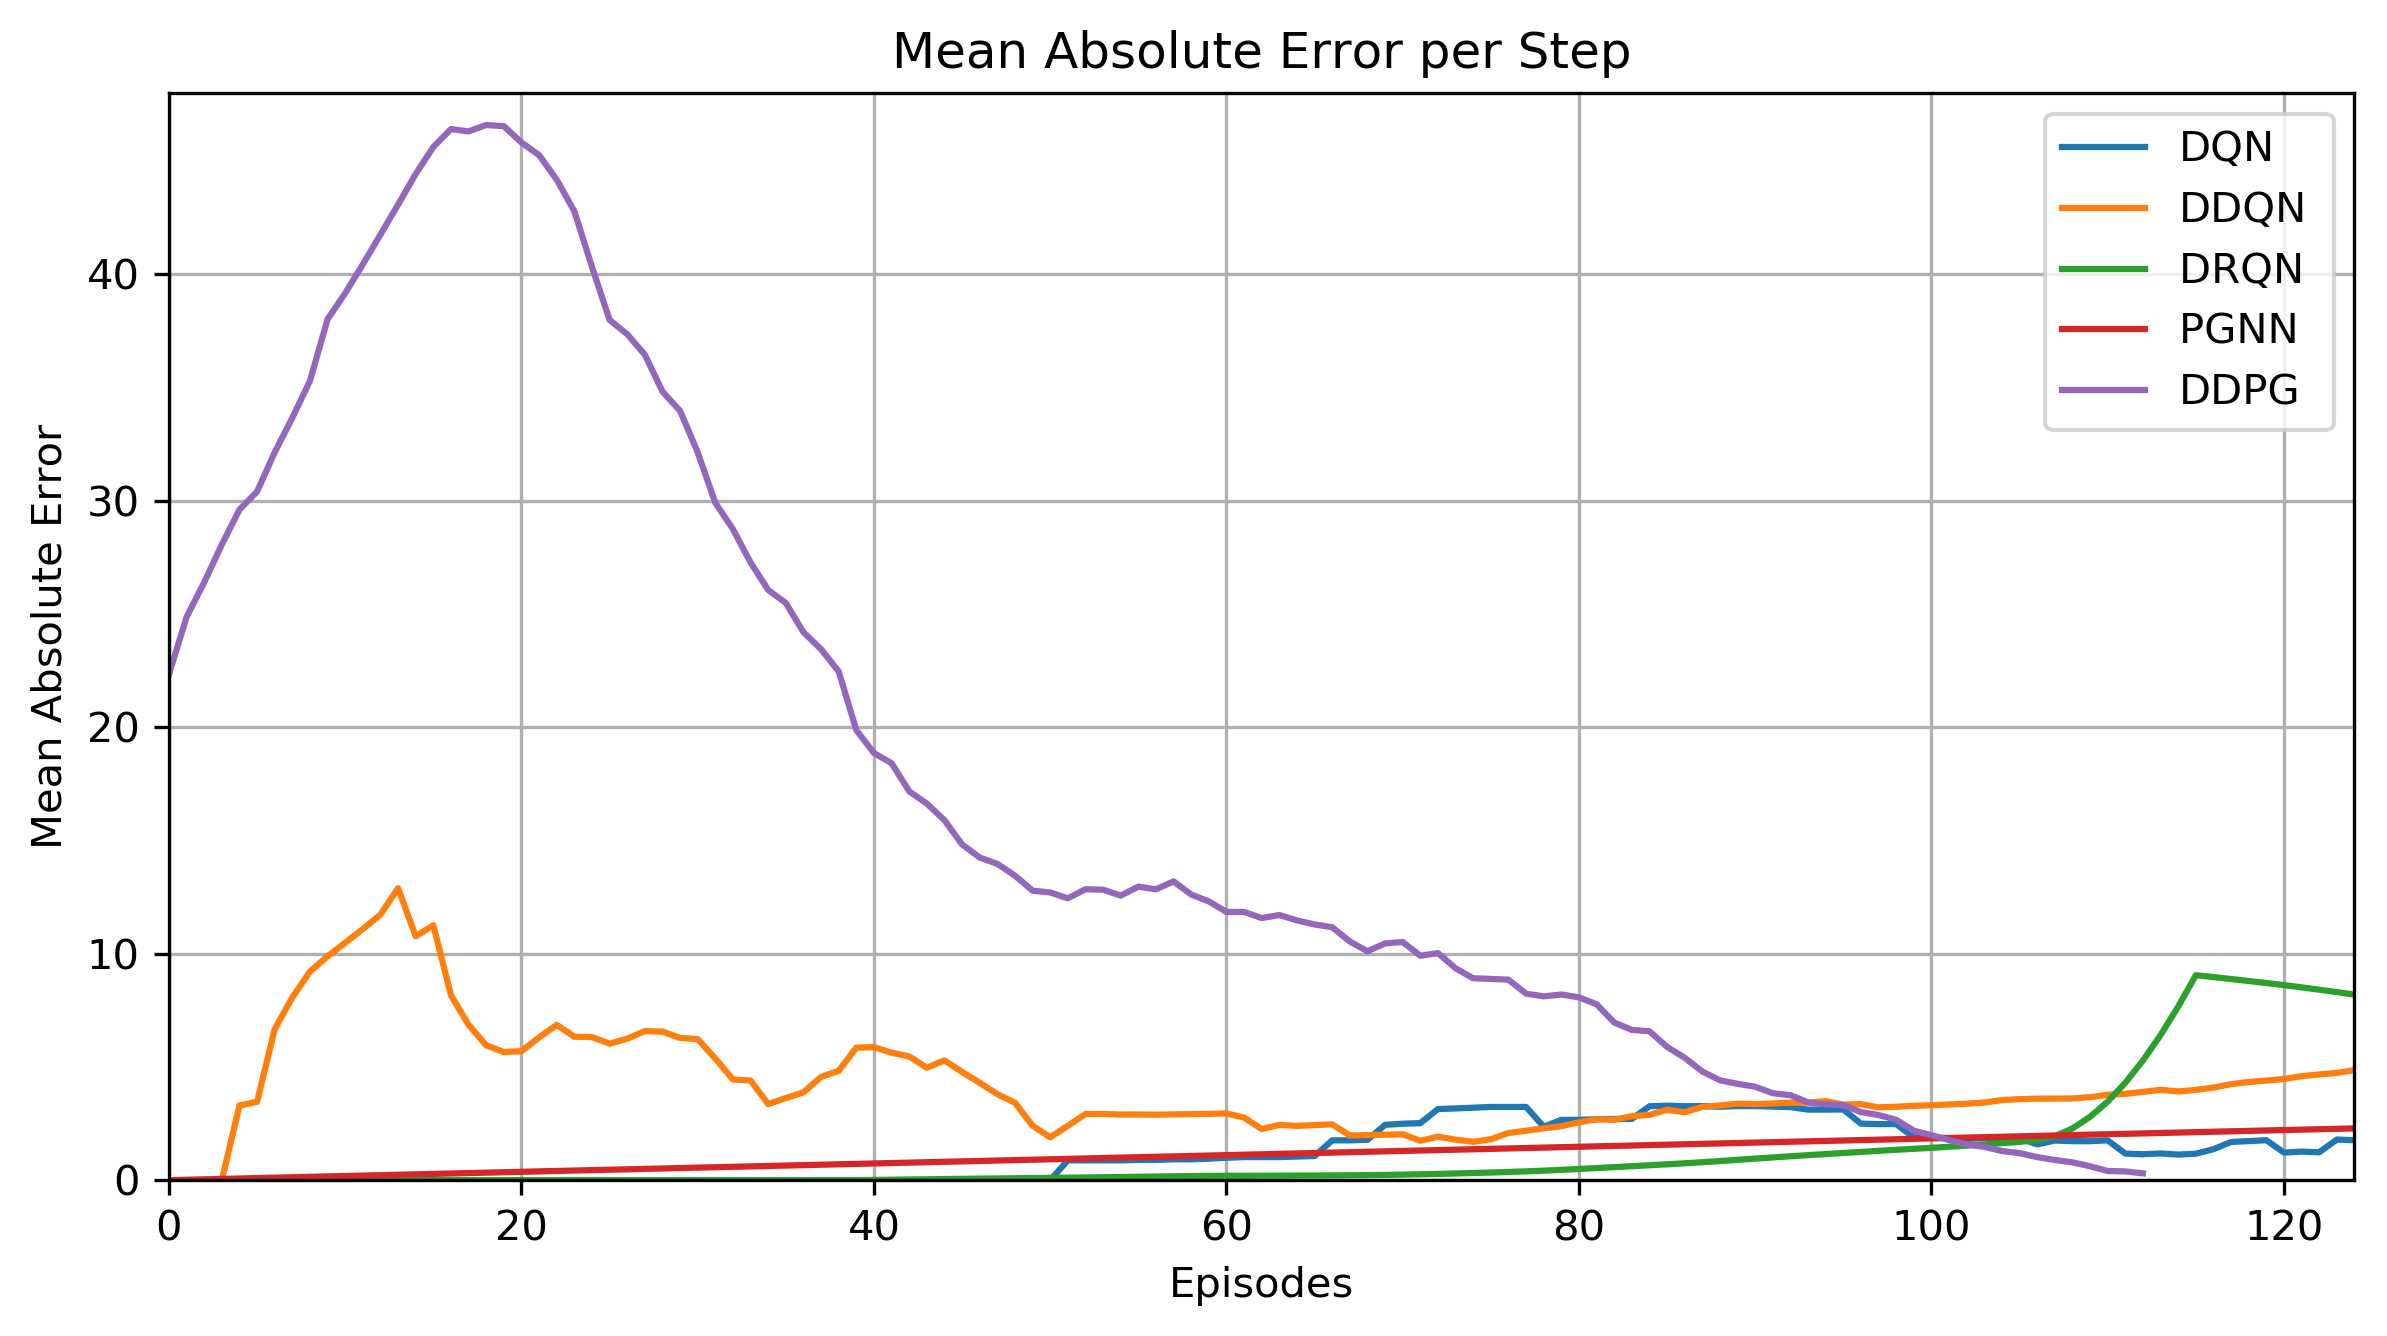

In [64]:
fig = plt.figure(figsize=[9.4, 4.8], dpi=300)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['mean_absolute_error'])

cumsum_vec = np.cumsum(np.insert(y1, 0, 0)) 
window_width= 1
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width



x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['mean_absolute_error'])

x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['mean_absolute_error'])

x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['mean_absolute_error'])

x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['mean_absolute_error'])  

 

y1_av = movingaverage(y1, 27)
plt.plot(y1_av, label='DQN', scaley=True )
y3_av = movingaverage(y3, 10)
plt.plot(y3_av, label='DDQN', scaley=True)
y4_av = movingaverage(y4, 20)
plt.plot(y4_av, label='DRQN ', scaley=True )

y5new = np.linspace(0,y5.max(),225)
x5new = np.linspace(x5.min(),x5.max() * 100,225)

y5_av = movingaverage(y5new, 10)
plt.plot(y5new, label='PGNN ', scaley=True )
y2_av = movingaverage(y2, 30)
plt.plot(y2_av, label='DDPG', scaley=True)
plt.grid()



#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('Mean Absolute Error')

plt.title("Mean Absolute Error per Step")
 
plt.autoscale(enable=True, axis='both', tight=True)
#plt.axis('equal')
plt.xlim(0, 124)
plt.ylim(0, 48)


#plt.axis('tight')
plt.legend()

plt.show()

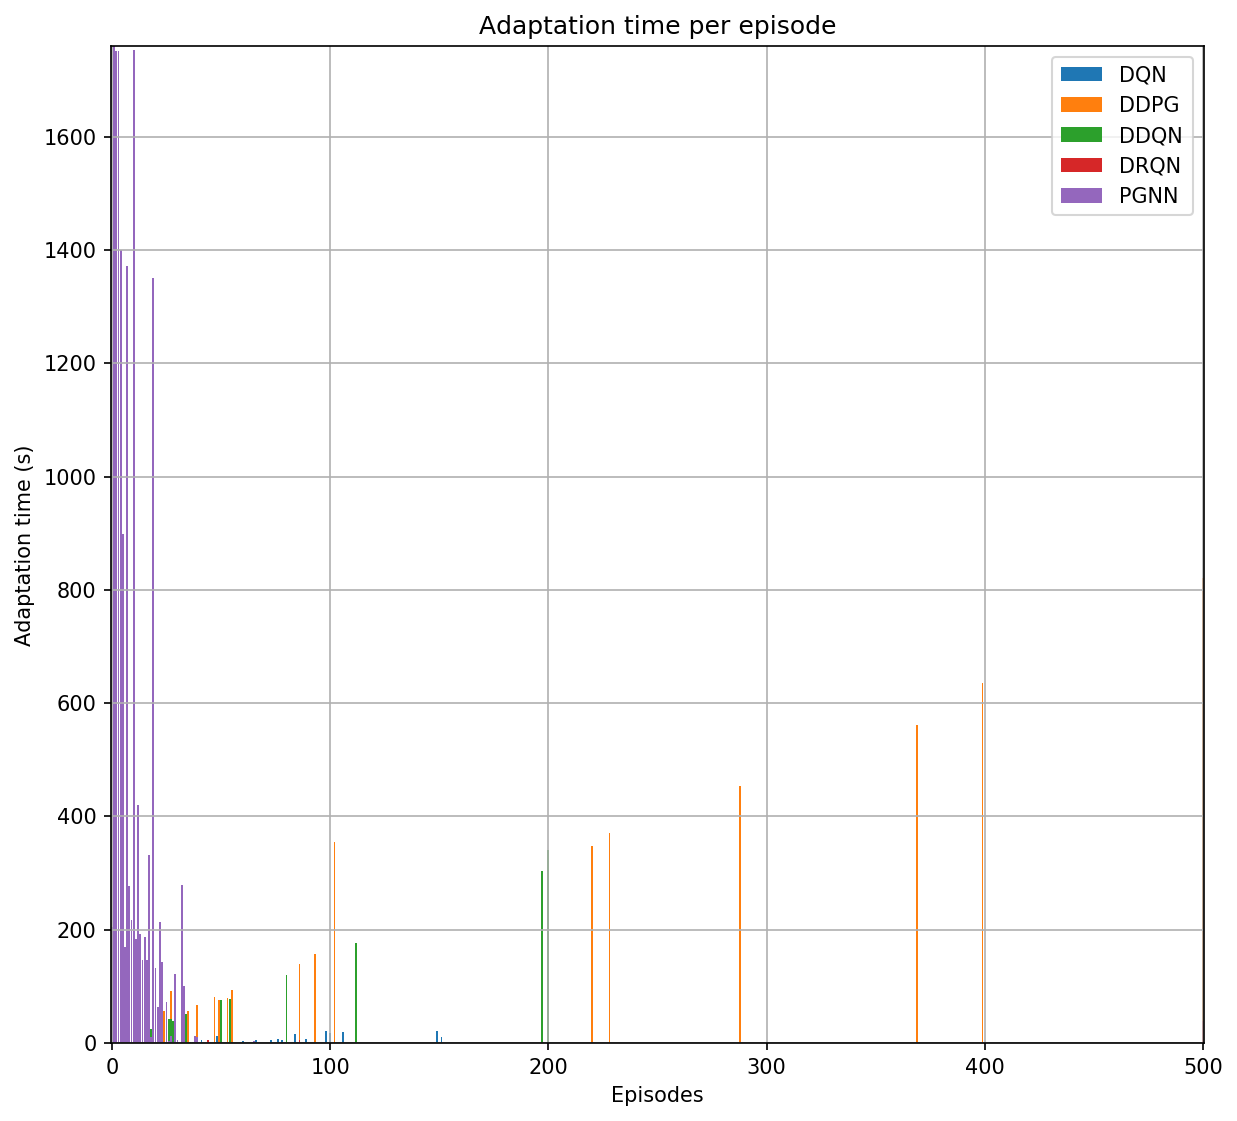

In [20]:
fig = plt.figure(figsize=[9.4, 8.8], dpi=150)
x1 = np.array(dqn['nb_episode_steps'])
y1 = np.array(dqn['duration'])

x2 = np.array(ddpg['nb_episode_steps'])
y2 = np.array(ddpg['duration'])

x3 = np.array(duel_dgn['nb_episode_steps'])
y3 = np.array(duel_dgn['duration'])

x4 = np.array(DQRN['nb_episode_steps'])
y4 = np.array(DQRN['duration'])

x5 = np.array(pg_duration['Step'])
y5 = np.array(PGNN['duration'])
ym5 = np.ma.masked_where(y5 < 600, y5)
#ym5 = np.ma.masked_where(ym5 > 0, ym5)
'''
plt.bar(x1, y1, label='DQN', align='center')
plt.bar(x3, y3, label='DDQN', align='center')
plt.bar(x4, y4, label='DRQN ', align='center')
plt.bar(x5, ym5, label='PGNN ', align='center')
plt.bar(x2, y2, label='DDPG', align='center')

'''
plt.bar(x1, y1, label='DQN')
plt.bar(x2, y2, label='DDPG')
plt.bar(x3, y3, label='DDQN')
plt.bar(x4, y4, label='DRQN')
plt.bar(x5, y5, label='PGNN ')


'''
plt.bar(x1, y1, label='DQN', align='center')
plt.bar(x2, y2, label='DDPG', align='center')
plt.bar(x3, y3, label='Duel DQN', align='center')
plt.bar(x4, y4, label='DQRN ', align='center')


#plt.bar(x5, y5, label='PGNN ', align='center')

plt.bar(x1, y1, label='DQN')
plt.bar(x2, y2, label='DDPG')
plt.bar(x3, y3, label='Duel DQN')
plt.bar(x4, y4, label='DQRN')
'''
plt.grid()



#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('Adaptation time (s)')

plt.title("Adaptation time per episode")
plt.autoscale(enable=True, axis='both', tight=True)
#plt.axis('equal')
plt.axis('tight')

plt.legend()

plt.show()

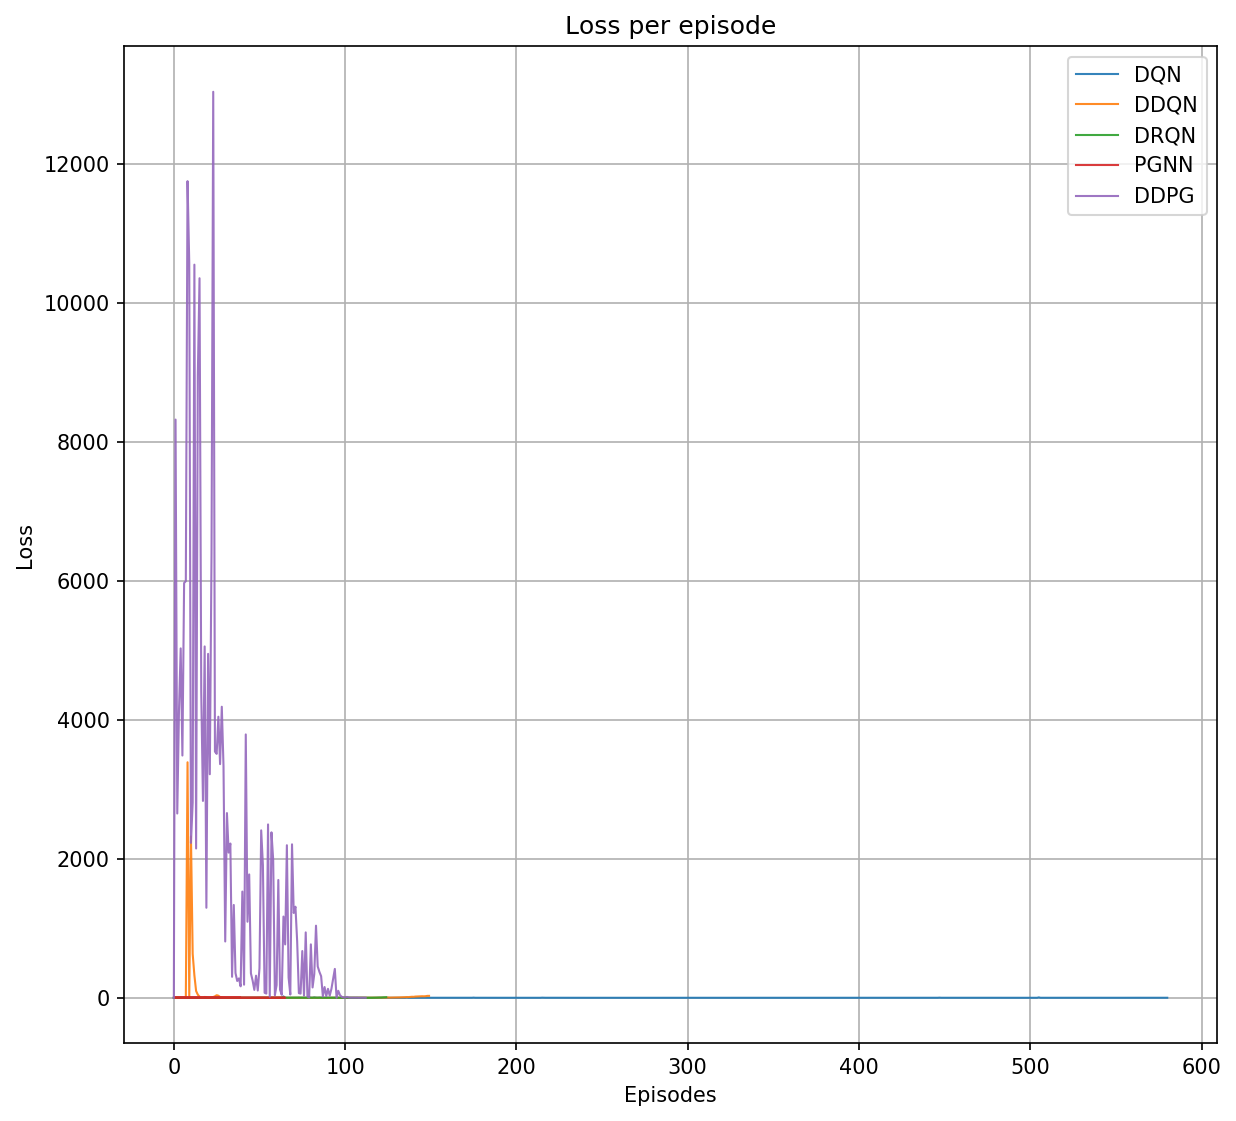

In [21]:
fig = plt.figure(figsize=[9.4, 8.8], dpi=150)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['loss'])
xm1 = np.ma.masked_where(x1 < 100, x1)


ym1 = np.ma.masked_where(y1 < 5, y1)


x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['loss'])
xm2 = np.ma.masked_where(x2 < 100, x2)


ym2 = np.ma.masked_where(y2 < 5, y2)


 

x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['loss'])
ym3 = np.ma.masked_where(y3 < 5, y3)
xm3 = np.ma.masked_where(x3 < 100, x3)

x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['loss'])
ym4 = np.ma.masked_where(y4 < 5, y4)
xm4 = np.ma.masked_where(x4 < 100, x4)

x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['loss'])

'''
plt.bar(x1, y1, label='DQN', align='center')
plt.bar(x3, y3, label='DDQN', align='center')
plt.bar(x4, y4, label='DRQN ', align='center')
plt.bar(x5, y5, label='PGNN ', align='center')
plt.bar(x2, y2, label='DDPG', align='center')

'''

plt.plot(x1, y1, label='DQN', linewidth=1, alpha=0.9)

plt.plot(x3, y3, label='DDQN', linewidth=1, alpha=0.9)
plt.plot(x4, y4, label='DRQN', linewidth=1, alpha=0.9)
plt.plot(x5, y5, label='PGNN', linewidth=1, alpha=0.9)

plt.plot(x2, y2, label='DDPG', linewidth=1, alpha=0.9)




#plt.plot(x1, y1, label='DQN')
#plt.plot(x2, y2, label='DDPQ')
#plt.plot(x3, y3, label='Duel DQN')

#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.autoscale(enable=True, axis='bot', tight=False)
plt.grid()

plt.title("Loss per episode")
plt.axis('equal')
plt.axis('tight')

plt.legend()

plt.show()

In [22]:
from scipy.interpolate import make_interp_spline, BSpline

x2s = x2.sort(axis=-1, kind='quicksort', order=None)
xnew = np.linspace(x2.min(),x2.max(),300) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(x2s, y1, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()

ValueError: Array must not contain infs or nans.

In [ ]:
DQN2  = pd.read_json('pgnn_PGNNv1_log.json')

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=[9.4, 4.8], dpi=300)
x1 = np.array(DQN2['episode'])
y1 = np.array(DQN2['duration'])
y1new = np.linspace(y1.min(),y1.max(),280)


x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['duration'])
y2new = np.linspace(y2.min(),y2.max(),113)


x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['duration'])
y3new = np.linspace(y3.min(),y3.max(),150)


x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['duration'])
y4new = np.linspace(y4.min(),y4.max(),125)


x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['duration'])
y5new = np.linspace(y5.min(),y5.max(),125)
x5new = np.linspace(x5.min(),x5.max(),125)


ysmoothed = gaussian_filter1d(y1, sigma=6)
plt.plot(x1, y1new, label='DQN')
ysmoothed = gaussian_filter1d(y2, sigma=6)
plt.plot(x2, y2new, label='DDPG')
ysmoothed = gaussian_filter1d(y3, sigma=6)
plt.plot(x3, y3new, label='DDQN')
ysmoothed = gaussian_filter1d(y4, sigma=6)
plt.plot(x4, y4new,  label='DRQN')

ysmoothed = gaussian_filter1d(y5new, sigma=3)
plt.plot(x5new, y5new, label='PGNN')
plt.grid(b=True, which='both')
plt.xlabel('Episodes')
plt.ylabel('Adaptation time (s)')

plt.errorbar(x1, y1new, yerr = 3.2, linestyle='dotted' )
plt.errorbar(x2, y2new, yerr = 3.2, linestyle='dotted' )
plt.errorbar(x3, y3new, yerr = 3.2, linestyle='dotted' )
plt.errorbar(x4, y4new, yerr = 3.2, linestyle='dotted' )
plt.errorbar(x5new, y5new, yerr = 3.2, linestyle='dotted' )



plt.autoscale(enable=True, axis='bot', tight=False)
plt.xlim(-1,124)

plt.ylim(-1,750)


plt.title("Adaptation time (s) per episode")
plt.legend()
#plt.axis('tight')
#plt.axis('equal')
plt.show()


In [ ]:
df = pd.DataFrame({'DDQN':duel_dgn['loss'], 'DDPG':ddpg['loss'], 'DQN':dqn['loss'], 'PGNN':PGNN['loss'], 'DRQN':DQRN['loss']})


duel_dgn.plot(kind="scatter", x="episode", y="loss", alpha=0.4,
         s=ddpg["loss"]/100, label="Loss",
         c="mean_absolute_error", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()


In [ ]:
df = df.fillna(0)

In [ ]:
fig = plt.figure(figsize=[9.4, 8.8], dpi=150)
ax1 = fig.add_subplot(111)
x1 = np.array(dqn['episode'])
y0=np.array(dqn['nb_steps'])
y1 = np.array(dqn['mean_q'])
y2 = np.array(dqn['episode_reward'])
y3 = np.array(dqn['duration'])
y4 = np.array(dqn['loss'])
y5 = np.array(dqn['mean_absolute_error'])

ax1.plot(np.log(df['DDQN']), np.log(df['DDQN']),  np.log(df['DDPG']), np.log(df['DRQN']), np.log(df['PGNN']) )
#ax1.plot(x1,  y1,  'r--', y3, 'g-o'  )


#ax1.legend()
#plt.plot(x1, y0, y1, y2, y3, y4, y5, label='DQN', align='center')
 


#plt.plot(x, x**2, label='quadratic')
#plt.plot(x, x**3, label='cubic')

plt.xlabel('Episodes')
plt.ylabel('mean_q')

plt.title("Mean Q")

plt.autoscale(enable=True, axis='both', tight=False)

plt.grid()
#plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=[19.4, 18.8], dpi=150)
df.hist()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[9.4, 8.8], dpi=150)


sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(nrows=3, ncols=2)
sns.despine(left=True)

# Generate a random univariate dataset
d = df['DQN']
d1= df['DDQN']
d2 = df['DRQN']
d3 = df['PGNN']
d4=df['DDPG']
# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=True, hist=True, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d1, kde=True, hist=True,  color="r", ax=axes[0,1])

# Plot a filled kernel density estimate
sns.distplot(d3, kde=True, hist=True, color="g", rug=False, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d4,kde=True, hist=True, color="m", ax=axes[1, 1])
sns.distplot(d4,kde=True, hist=True, color="m", ax=axes[2, 0])


plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
from pandas.tools.plotting import scatter_matrix
attributes = ["DQN", "DDQN", "DRQN", "PGNN", "DDPG"]
scatter_matrix(df[attributes], figsize=(12, 8))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


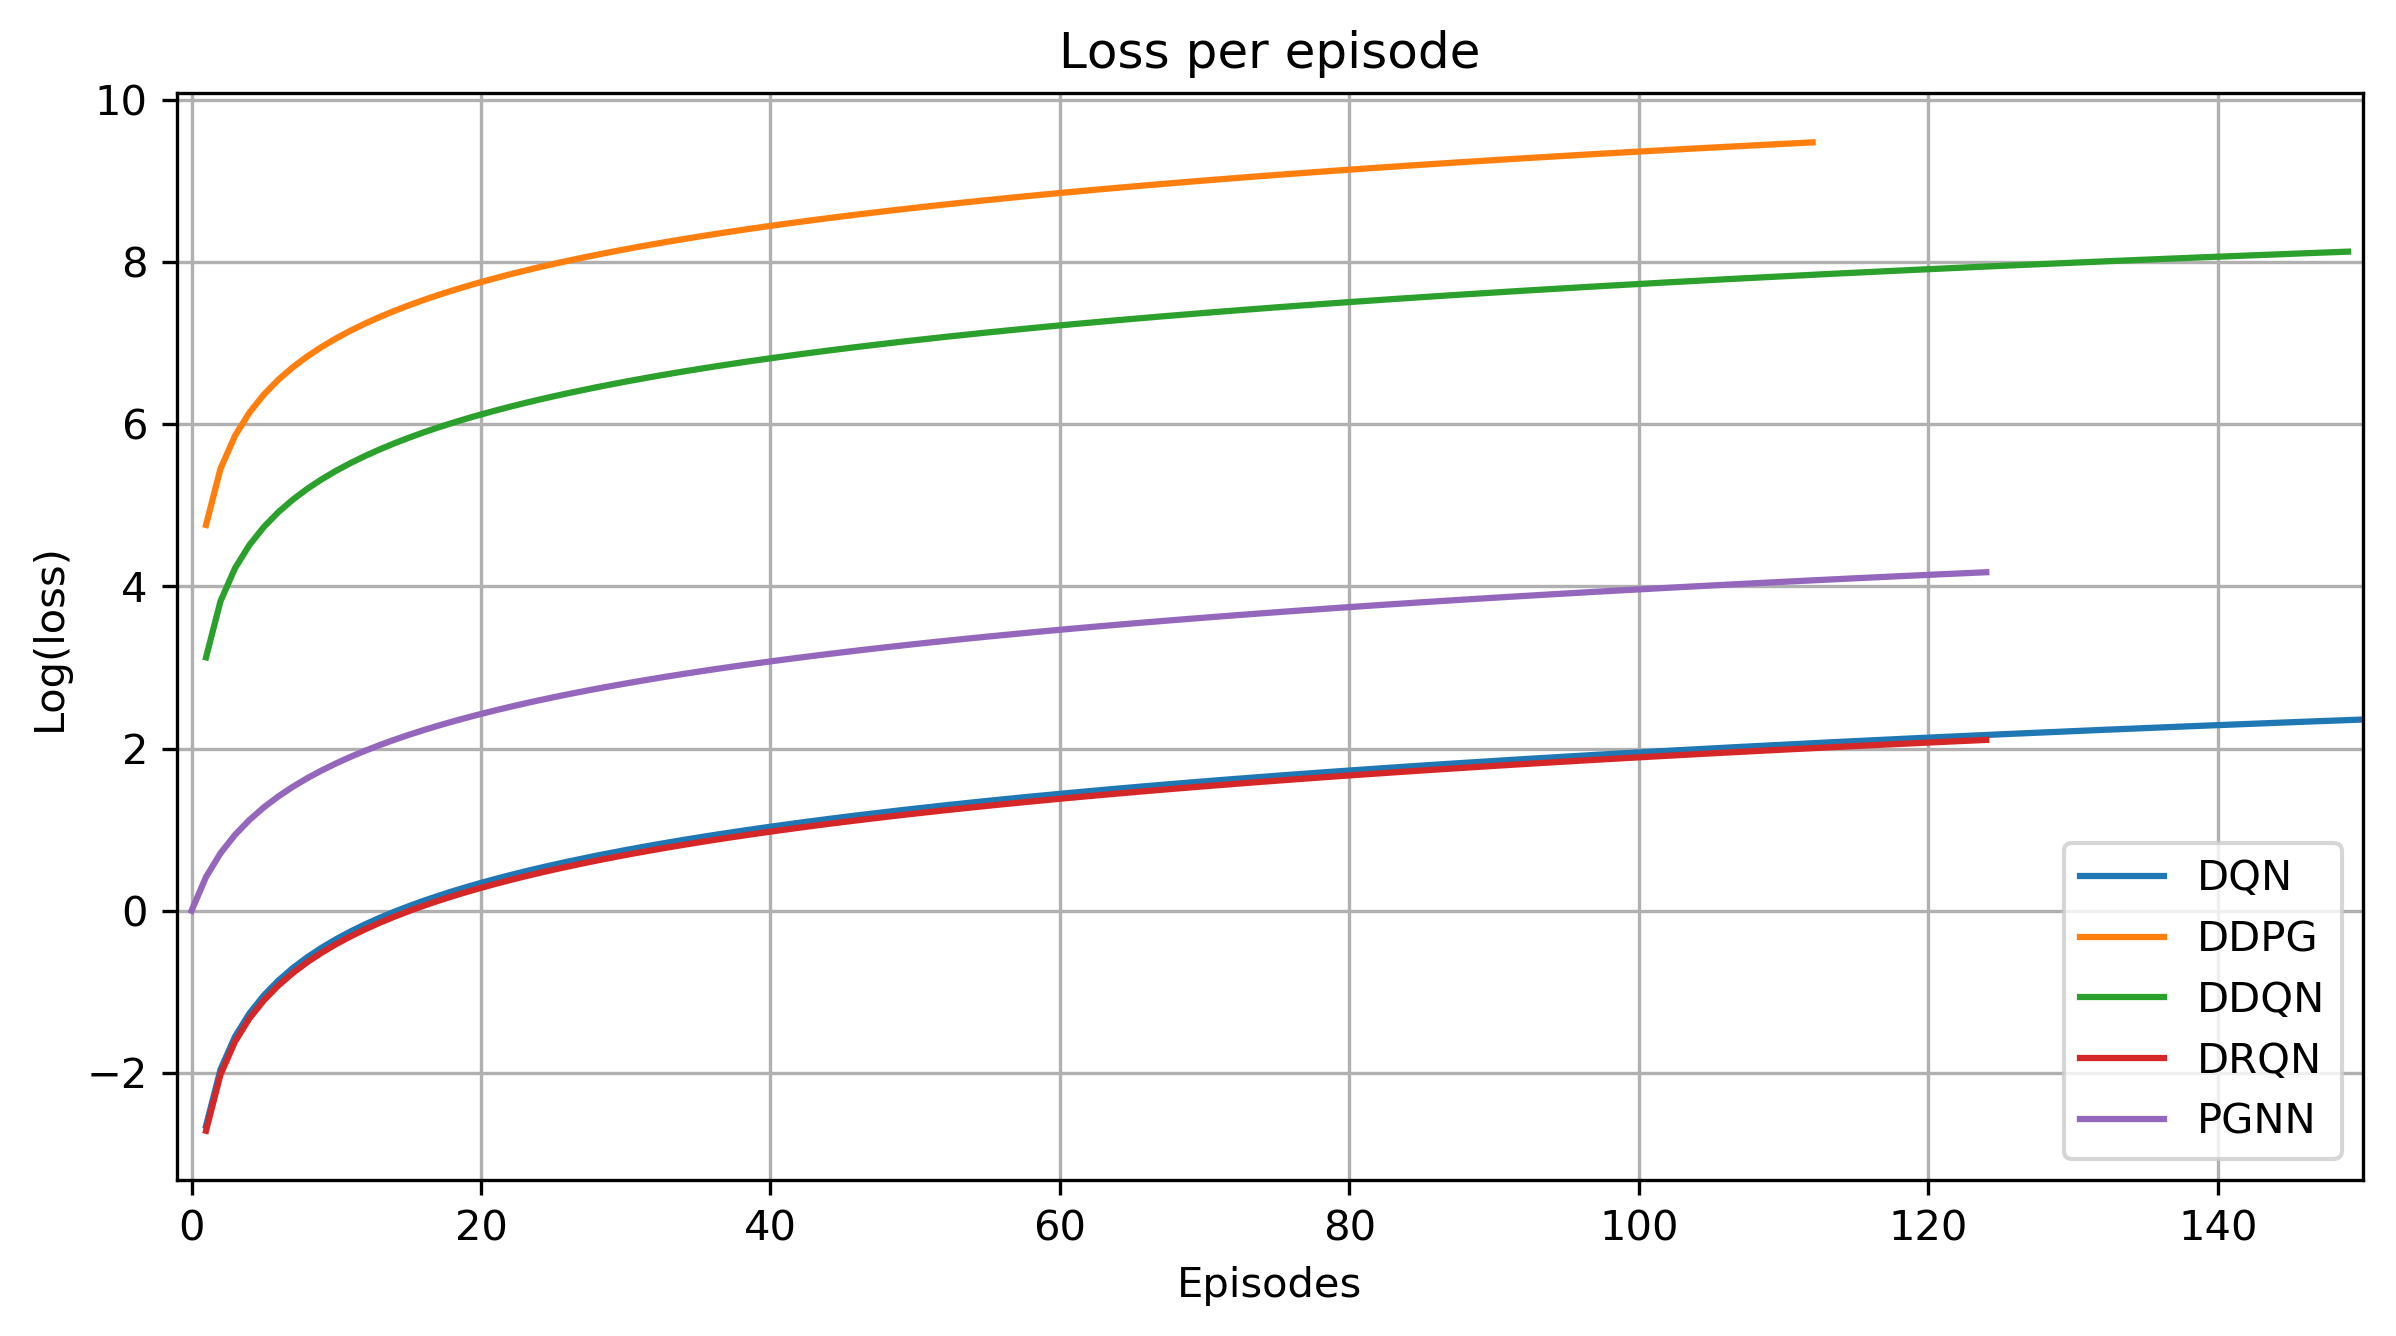

In [65]:
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=[9.4, 4.8], dpi=300)
x1 = np.array(dqn['episode'])
y1 = np.array(dqn['loss'])
y1new = np.linspace(y1.min(),y1.max(),280)


x2 = np.array(ddpg['episode'])
y2 = np.array(ddpg['loss'])
y2new = np.linspace(y2.min(),y2.max(),113)


x3 = np.array(duel_dgn['episode'])
y3 = np.array(duel_dgn['loss'])
y3new = np.linspace(y3.min(),y3.max(),150)


x4 = np.array(DQRN['episode'])
y4 = np.array(DQRN['loss'])
y4new = np.linspace(y4.min(),y4.max(),125)


x5 = np.array(PGNN['episode'])
y5 = np.array(PGNN['loss'])
y5new = np.linspace(y5.min(),y5.max(),125)
x5new = np.linspace(x5.min(),x5.max(),125)


plt.plot(np.log(y1new) , label='DQN')

y2_av = movingaverage(y2, 100)

plt.plot(np.log(y2new), label='DDPG')
 
y3_av = movingaverage(y3, 100)


plt.plot(np.log(y3new), label='DDQN')
plt.plot(np.log(y4new),  label='DRQN')

plt.plot(np.log(x5new), label='PGNN')
plt.grid()
plt.xlabel('Episodes')
plt.ylabel('Log(loss)')
#plt.autoscale(enable=True, axis='bot', tight=False)
plt.xlim(-1,150)
#plt.ylim(-1,1000)


plt.title("Loss per episode")
plt.legend()
#plt.axis('tight')
#plt.axis('equal')
plt.show()



In [ ]:
#mean_q = pd.DataFrame({'Duel DQN':duel_dgn['mean_q'], 'DDPG':ddpg['mean_q'], 'DQN':dqn['mean_q']})



In [ ]:
mean_q.info()

In [ ]:
import numpy as np
import seaborn as sns
#data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
sns.set_style('whitegrid')
sns.kdeplot(duel_dgn['mean_q'], bw=20)